In [31]:
import pandas as pd
import numpy as np
from nltk import FreqDist
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
 
sns.set_style("whitegrid")
sns.set_context("paper")

%matplotlib inline

In [67]:
np.random.randint(0,5)

2

In [ ]:
p

In [2]:
df = pd.read_csv(r'2019politicostweeter.csv',parse_dates=['fecha'])

We apply all the transformations and tokenizations requiered in order to work with the data

In [3]:
wt = RegexpTokenizer('[\w]+')
df['tweets'] =df['tweets'].apply(lambda x: x.lower())
df['tw'] = df['tweets'].apply(lambda x: wt.tokenize(x))
badwords=stopwords.words('spanish')
morebw = ['https','t','co','En','vivo','rt','s√©']
for x in morebw:
    badwords.append(x)
df['tw'] = df['tw'].apply(lambda x: [word for word in x if word not in badwords])
df['tws']=df['tw'].apply(lambda x: ' '.join(x))
df['target'] = df['corriente'].map({'peronista':0,'pro':1})
df=df.drop_duplicates('tws').reset_index(drop=True)

In [4]:
df.shape

(6487, 7)

In [5]:
df.head()

tweets               fecha  \
0  s√© que por estas horas hay mucha ansiedad pol√≠... 2019-05-23 22:15:03   
1  #diamundialdelsindromededown\r\r\r\r\r\r\r\r\r... 2019-03-21 20:37:21   
2  esto no es una utop√≠a, es lo que estamos hacie... 2019-07-13 15:49:05   
3  el sistema de desag√ºes cloacales de la ciudad ... 2019-08-21 11:41:01   
4  mejor rascar la urna que el fondo de la olla p... 2019-09-15 01:37:09   

           twitter  corriente  \
0     danielscioli  peronista   
1         RLavagna  peronista   
2       mariuvidal        pro   
3  frigeriorogelio        pro   
4      FerIglesias        pro   

                                                  tw  \
0  [horas, mucha, ansiedad, pol√≠tica, medi√°tica, ...   
1  [diamundialdelsindromededown, derechos, vida, ...   
2  [utop√≠a, haciendo, tres, meses, dejar, nunca, ...   
3  [sistema, desag√ºes, cloacales, ciudad, formosa...   
4  [mejor, rascar, urna, fondo, olla, ver, si, li...   

                                                 tws  target  
0  horas mucha ansiedad pol√≠tica medi√°tica compre...       0  
1  diamundialdelsindromededown derechos vida dign...       0  
2  utop√≠a haciendo tres meses dejar nunca proyect...       1  
3  sistema desag√ºes cloacales ciudad formosa anti...       1  
4  mejor rascar urna fondo olla ver si lig√°s carg...       1

In [6]:
def get_freq(df,twitter,column='twitter',nfreq=50):#returns the most frequent terms used by the target twitter account or political afilation
    frequ = df.loc[df[column]==twitter,'tw'].tolist()
    frequ = [item for sublist in frequ for item in sublist]
    return FreqDist(frequ).most_common()[:nfreq]
    

The funcitions below it calculates the similarity(using cosine similary) between each tweet of a certein account versus every other tweet from the rest. For every tweet that surparses a given tolerance it adds it up and returns a bar plot with the results

In [93]:
def simil(df,twitter,tol=0.10):
    pallets = ['dark','coolwarm','deep','hls','husl']
    dic=defaultdict(int)
    user = df.loc[df['twitter']==twitter].reset_index(drop=True)
    rest = df.loc[df['twitter']!=twitter].reset_index(drop=True)
    vectorizer = TfidfVectorizer()
    restM = vectorizer.fit_transform(rest['tws'])
    userM = vectorizer.transform(user['tws'])
    for i in range(userM.shape[0]):
        imil=cosine_similarity(userM[i], restM)
        idx = np.argwhere((imil>tol)&(imil<1))
        if idx.any():
            for x in idx:
                dic[rest['twitter'][x[1]]] += 1
    plt.figure(figsize=(25,10))
    plt.title(f'{twitter} Similarity', weight='bold').set_fontsize('18')
    sns.set_context('poster')
    plt.xlabel('Twitter',weight = 'bold')
    sns.barplot(x=list(dic.keys()),y=list(dic.values()),palette=pallets[np.random.randint(0,4)])
    plt.xticks(rotation=45)

# Frequency Macri and Fernandez 

In [26]:
MM=pd.DataFrame(get_freq(df,'mauriciomacri',nfreq=25),columns=['Term','Freq'])

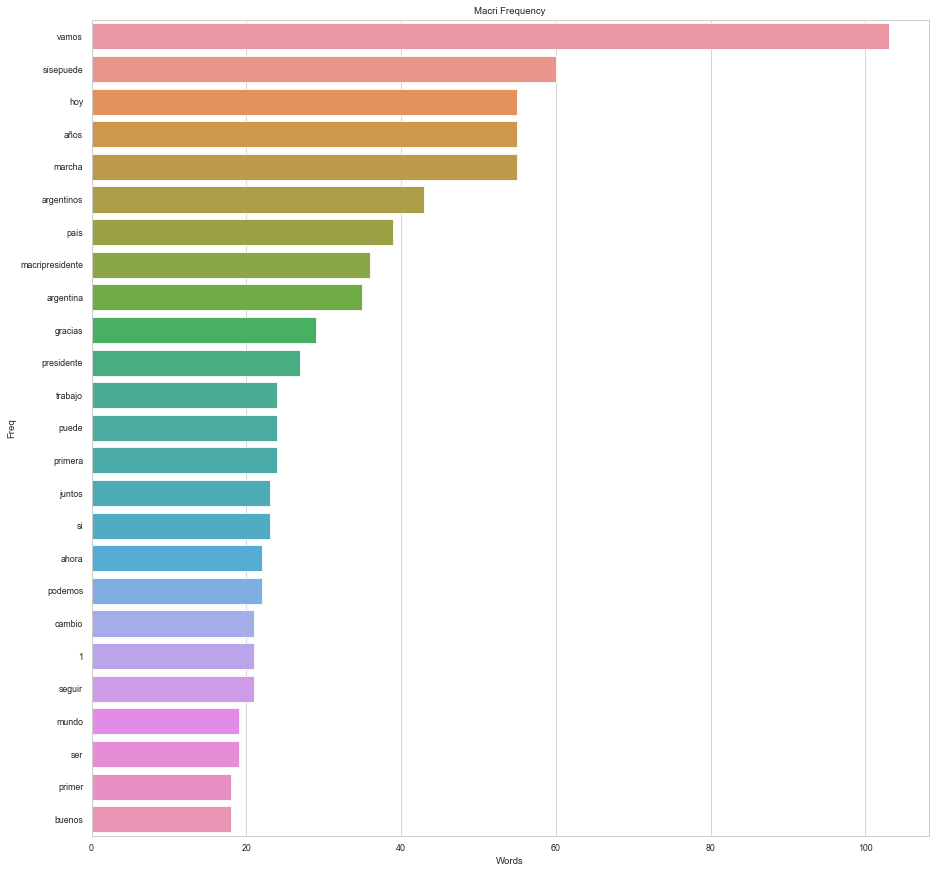

In [27]:
plt.figure(figsize=(15,15))
plt.title('Macri Frequency')
sns.barplot(x=MM['Freq'],y=MM['Term'])
plt.xlabel('Words')
plt.ylabel('Freq')
plt.show()


In [28]:
AF=pd.DataFrame(get_freq(df,'alferdez',nfreq=25),columns=['Term','Freq'])

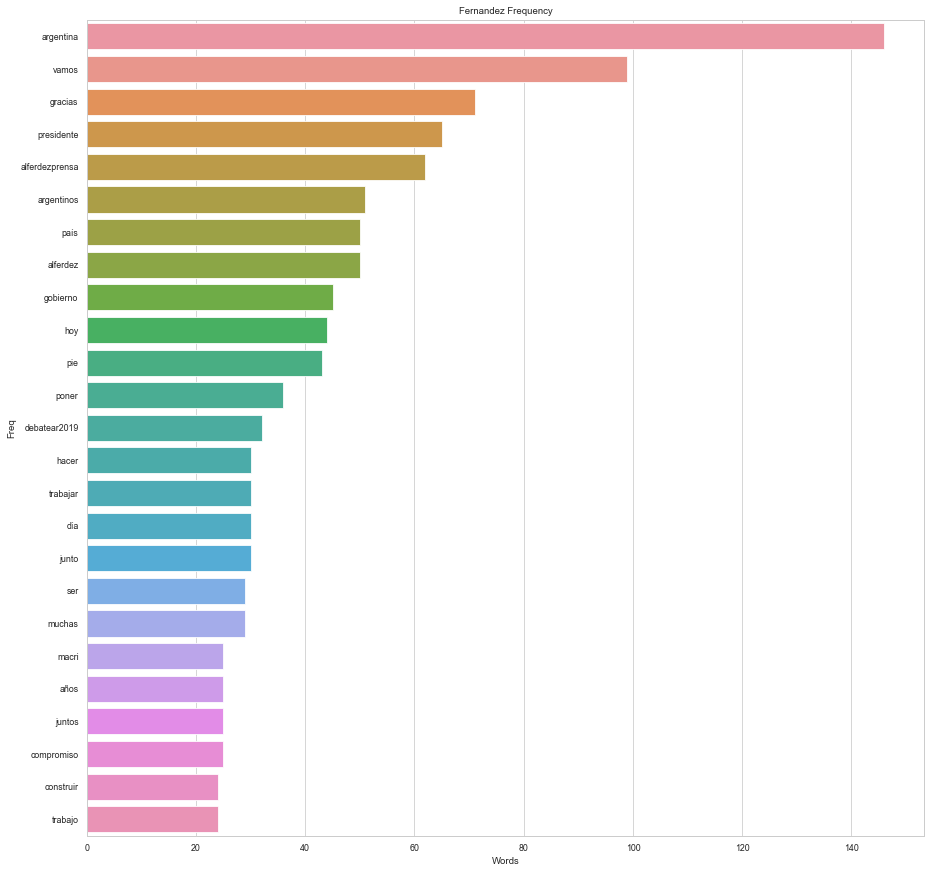

In [29]:
plt.figure(figsize=(15,15))
plt.title('Fernandez Frequency')
sns.barplot(x=AF['Freq'],y=AF['Term'])
plt.xlabel('Words')
plt.ylabel('Freq')
plt.show()

# Peronism vs Pro WordClouds

## Peronism

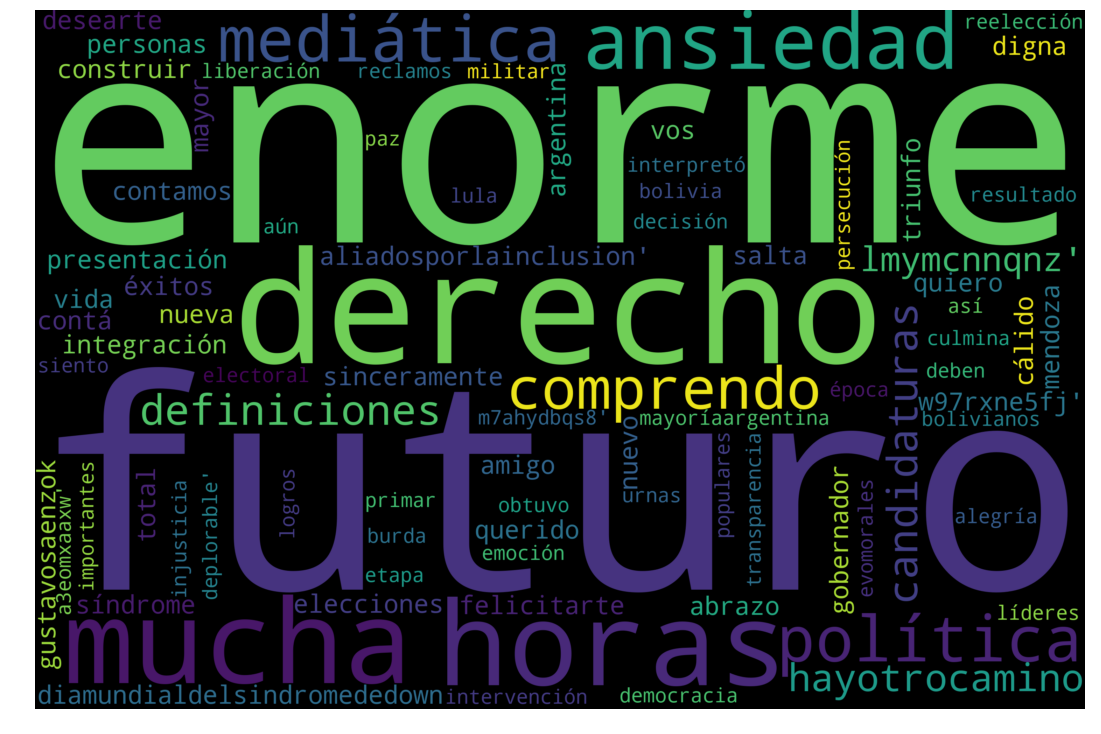

In [32]:
plt.figure(figsize=(15,10))
PERO = df.loc[df['corriente']=='peronista','tw'].apply(lambda x: ' '.join(x)).values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(PERO))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Pro

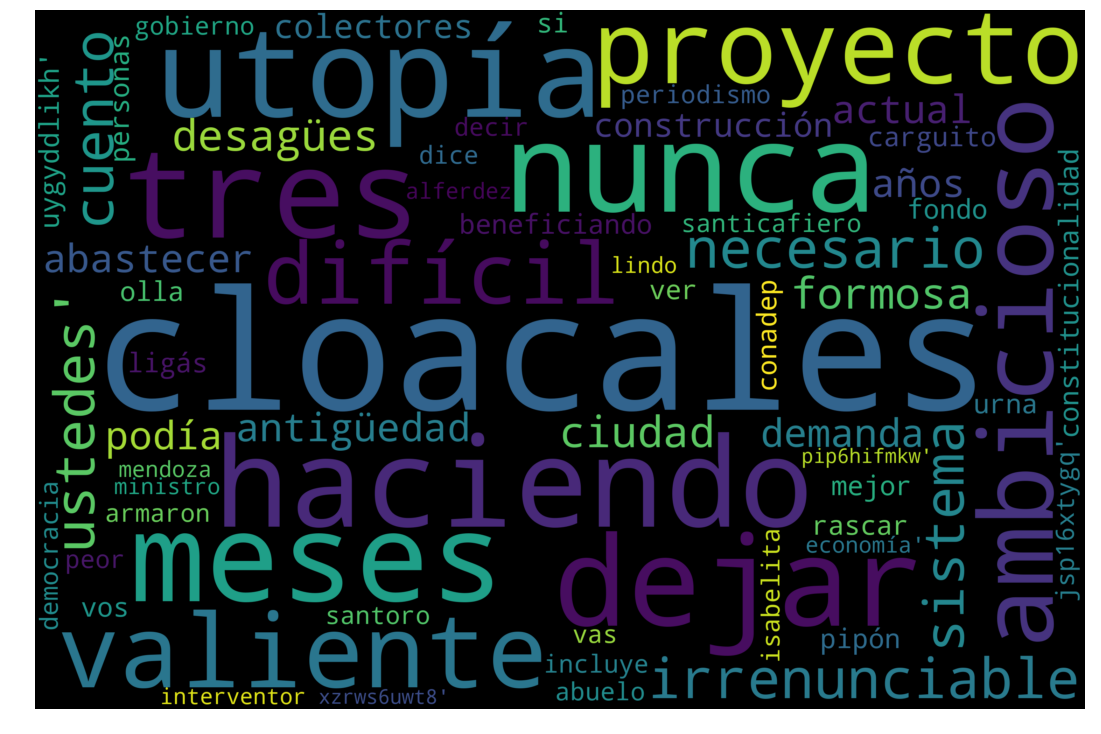

In [34]:
plt.figure(figsize=(15,10))
PRO = df.loc[df['corriente']=='pro','tw'].apply(lambda x: ' '.join(x)).values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(PRO))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Showing similarity between the accounts

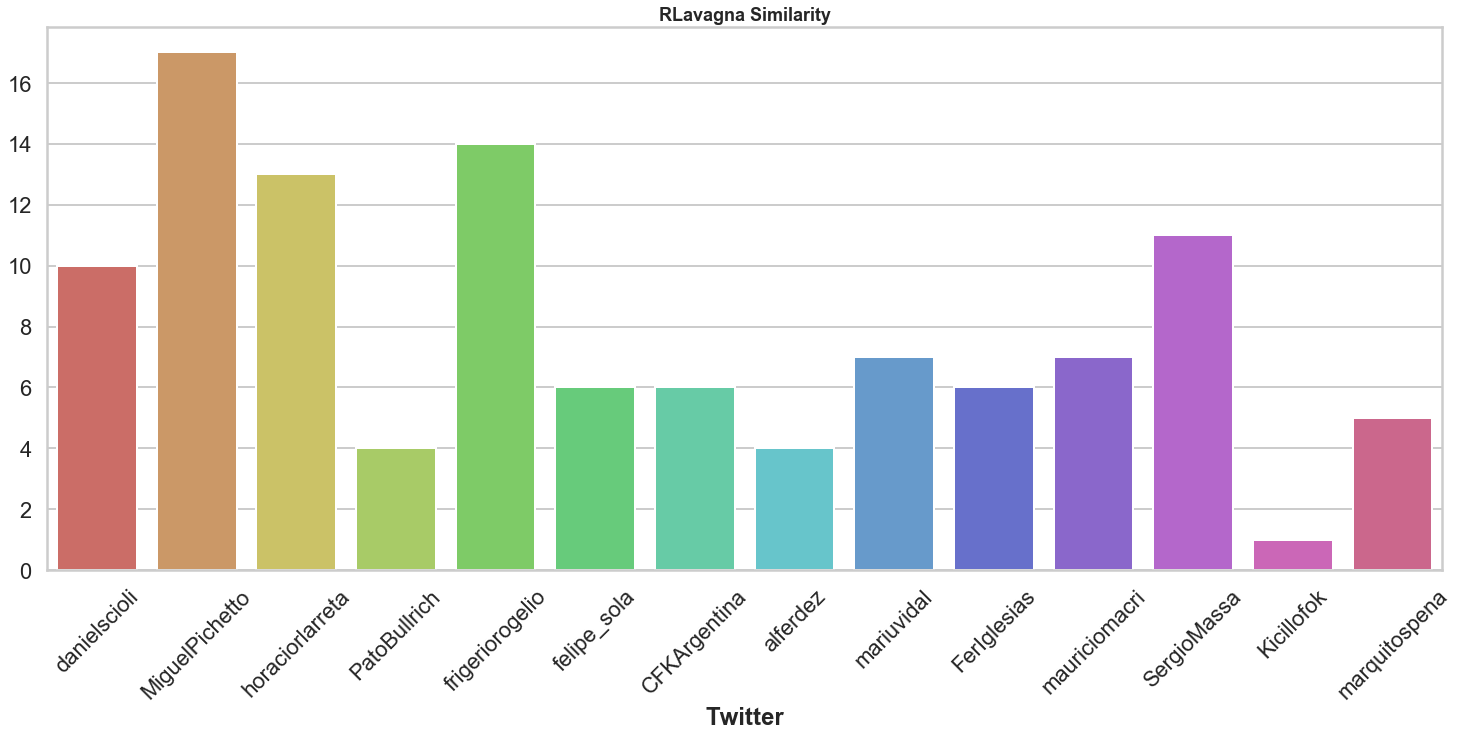

In [94]:
simil(df,'RLavagna',tol=0.30)

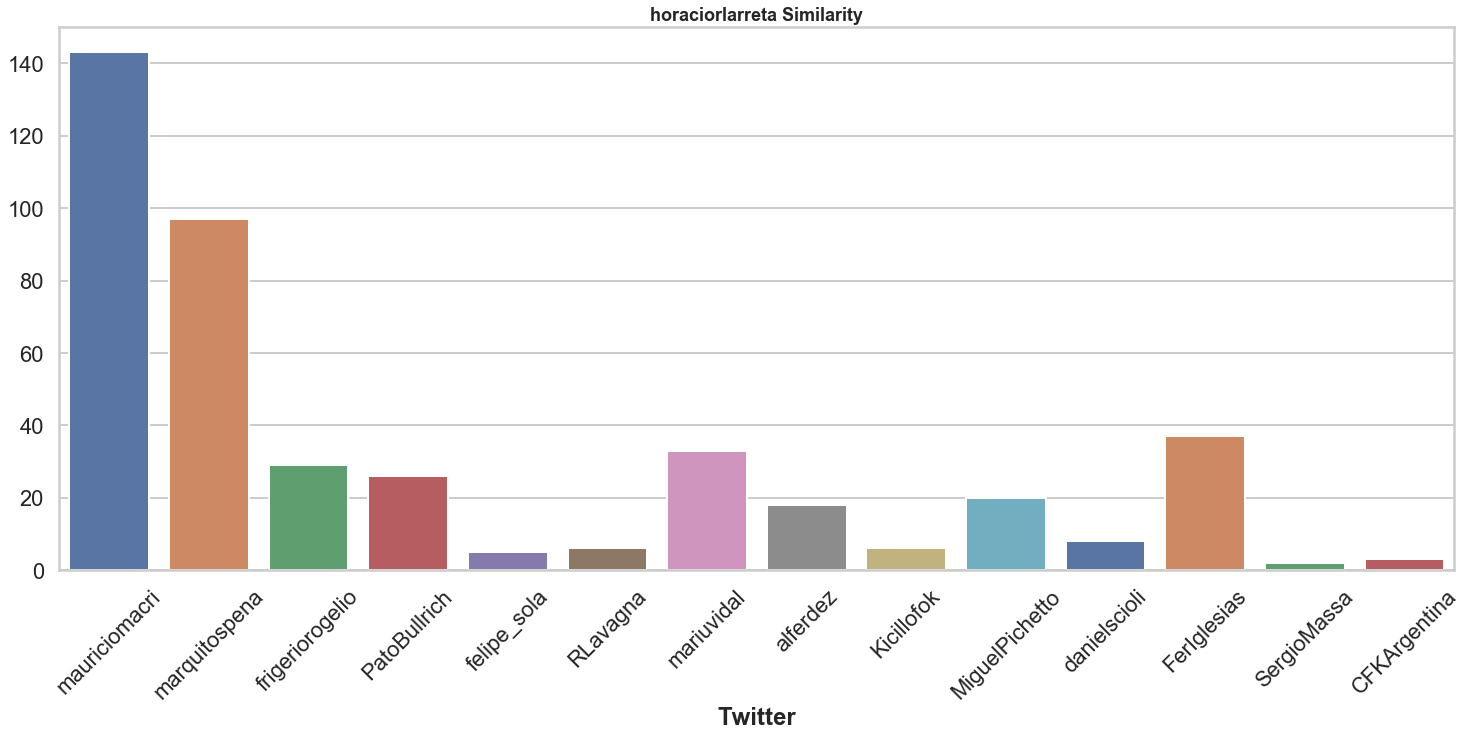

In [95]:
simil(df,'horaciorlarreta',tol=0.30)

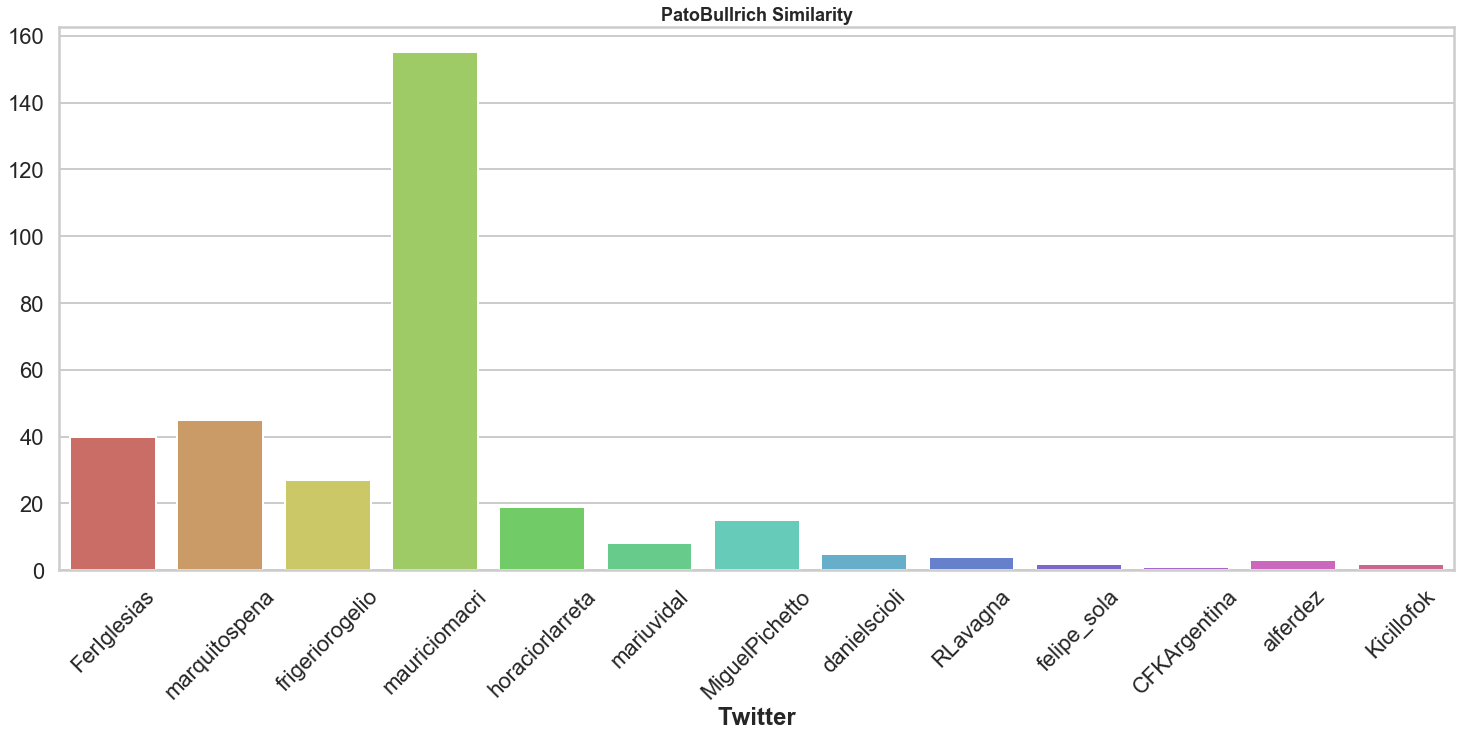

In [96]:
simil(df,'PatoBullrich',tol=0.30)

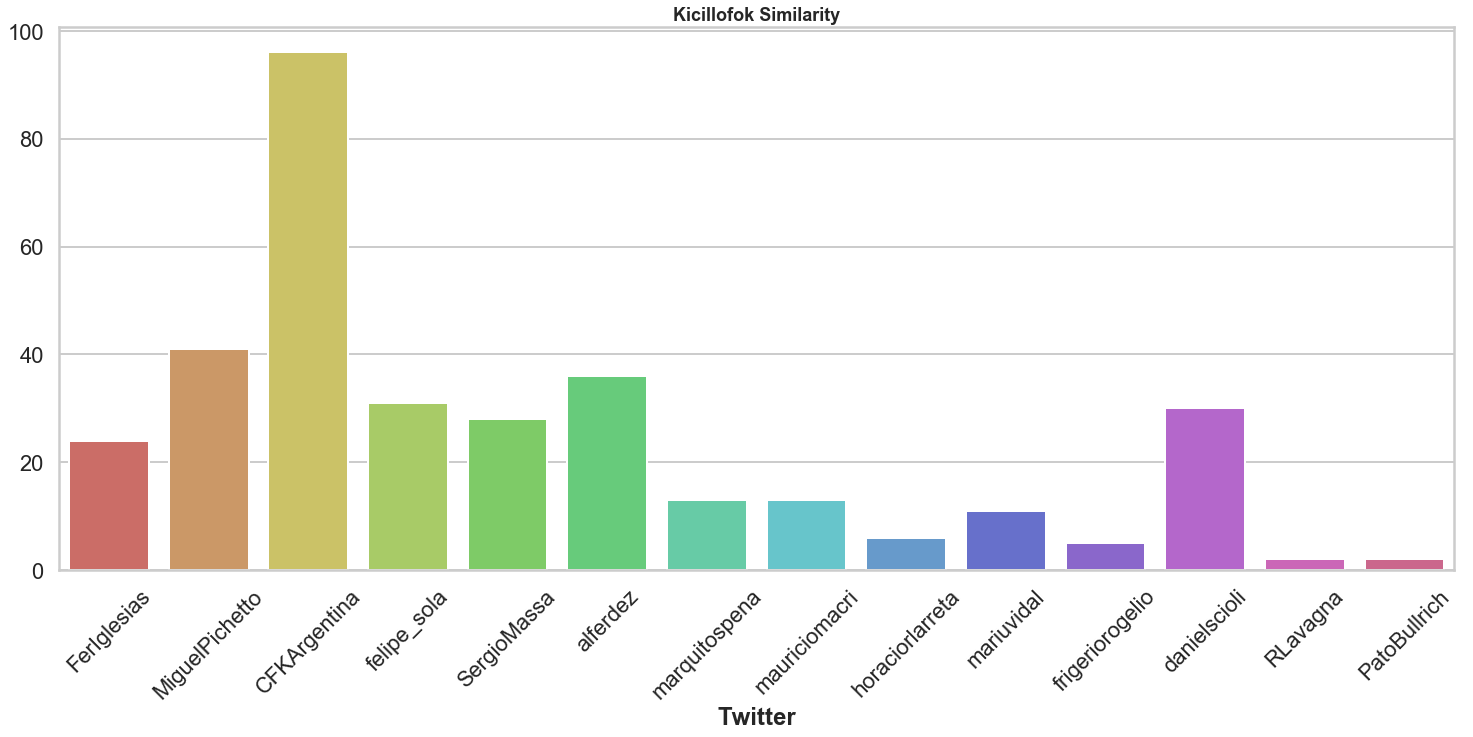

In [97]:
simil(df,'Kicillofok',tol=0.30)

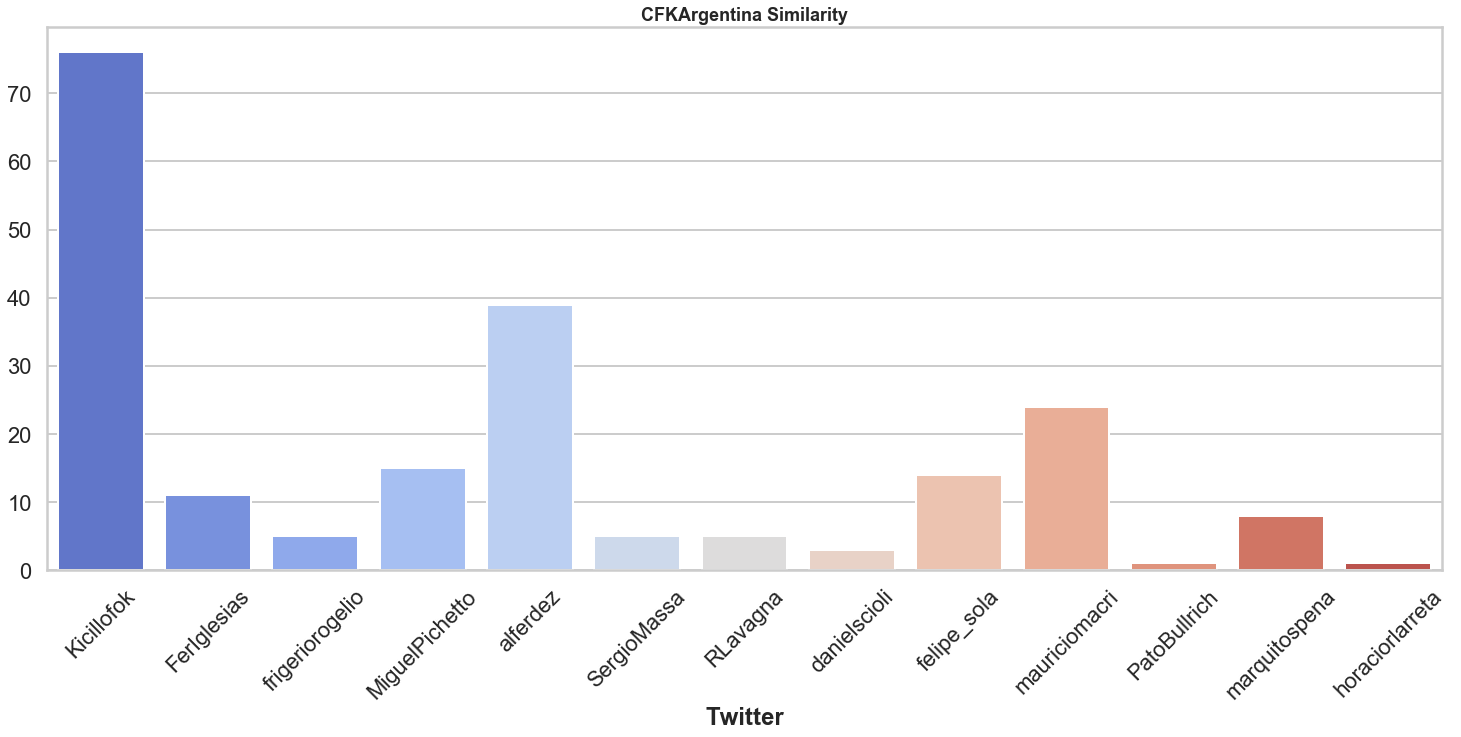

In [98]:
simil(df,'CFKArgentina',tol=0.30)

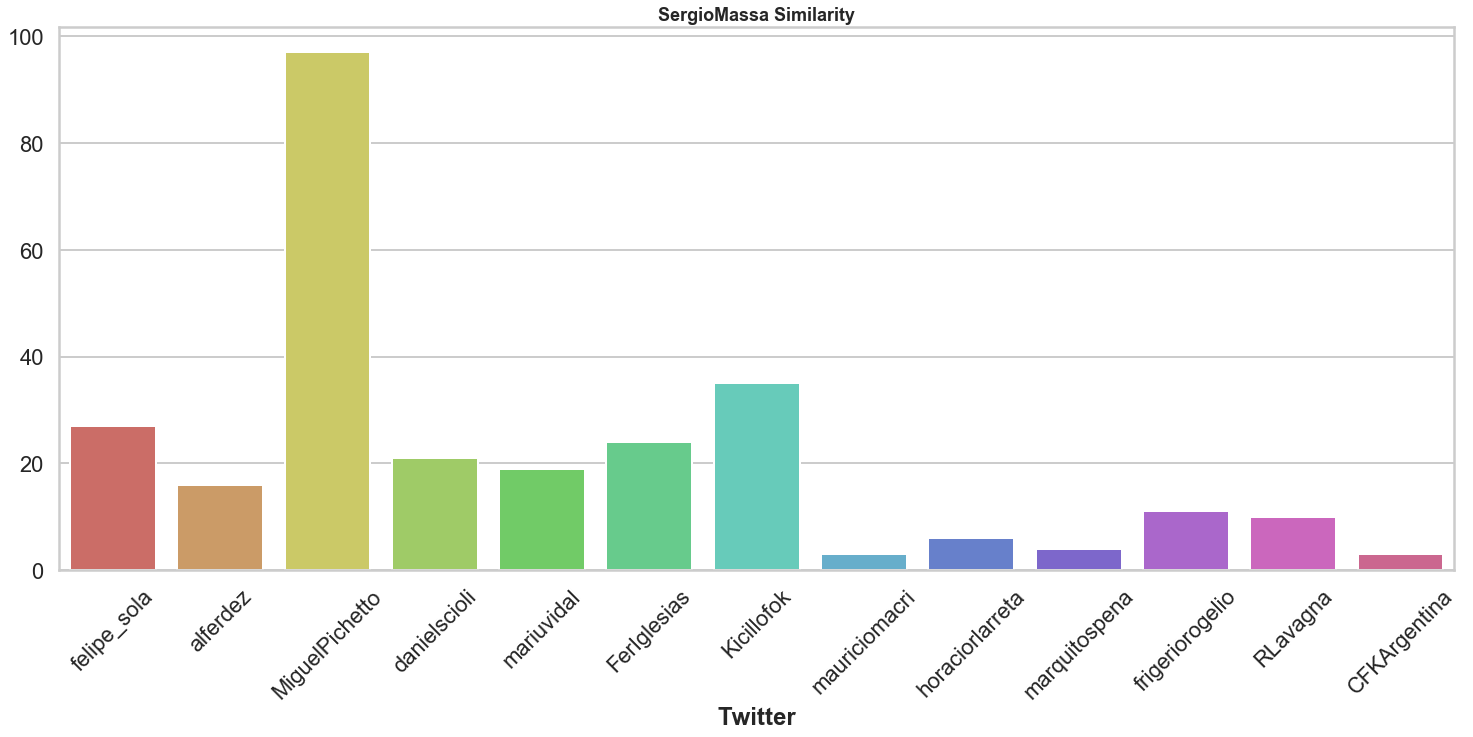

In [99]:
simil(df,'SergioMassa',tol=0.30)

# Classifier

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Vectorization and Model selection

In [84]:
cv = CountVectorizer(stop_words=badwords)
vec = TfidfTransformer()
clf1 = SVC()
clf2 = GaussianNB()
clf3= RandomForestClassifier()

In [85]:
X = df['tweets']
y = df['target']

In [86]:
pipelines = []
pipelines.append(('vectSVM',Pipeline([('Count',cv),('Vect',vec),('SVM',clf1)])))
pipelines.append(('vectBayes',Pipeline([('Count',cv),('Vect',vec),('NB',clf3)])))
pipelines.append(('RandomForest',Pipeline([('Count',cv),('Vect',vec),('RF',clf3)])))

In [88]:
for name,model in pipelines:
    score = cross_val_score(model,X,y,scoring='accuracy',cv=10).mean().round(4)
    print(f'{name}: {score}')
    
   

vectSVM: 0.6487
vectBayes: 0.8236
RandomForest: 0.8273


Hyper-parameter tunning

In [123]:
RandomF = Pipeline([('Count',cv),('Vect',vec),('RF',RandomForestClassifier())])

In [124]:
param_grid = {'RF__n_estimators':[200,250,300]}

In [125]:
grid = GridSearchCV(RandomF,param_grid,scoring='accuracy',cv=10,n_jobs=-1,verbose=3)

In [126]:
grid.fit(X,y)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('Count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['de', 'la...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'RF__n_estimators': [200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [127]:
grid.best_score_

0.8660397718513951

In [128]:
grid.best_params_

{'RF__n_estimators': 250}

In [129]:
RandomF = grid.estimator

In [130]:
RandomF.fit(X,y)

Pipeline(memory=None,
     steps=[('Count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['de', 'la...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

Finaly we apply our model to the data set in order to have and estimation of how much peronist or pro is each tweet

In [138]:
df['Peroproba']=RandomF.predict_proba(df['tweets'])[:,0]
df['Proproba']=RandomF.predict_proba(df['tweets'])[:,1]

In [139]:
df.head(5)

tweets               fecha  \
0  s√© que por estas horas hay mucha ansiedad pol√≠... 2019-05-23 22:15:03   
1  #diamundialdelsindromededown\r\r\r\r\r\r\r\r\r... 2019-03-21 20:37:21   
2  esto no es una utop√≠a, es lo que estamos hacie... 2019-07-13 15:49:05   
3  el sistema de desag√ºes cloacales de la ciudad ... 2019-08-21 11:41:01   
4  mejor rascar la urna que el fondo de la olla p... 2019-09-15 01:37:09   

           twitter  corriente  \
0     danielscioli  peronista   
1         RLavagna  peronista   
2       mariuvidal        pro   
3  frigeriorogelio        pro   
4      FerIglesias        pro   

                                                  tw  \
0  [horas, mucha, ansiedad, pol√≠tica, medi√°tica, ...   
1  [diamundialdelsindromededown, derechos, vida, ...   
2  [utop√≠a, haciendo, tres, meses, dejar, nunca, ...   
3  [sistema, desag√ºes, cloacales, ciudad, formosa...   
4  [mejor, rascar, urna, fondo, olla, ver, si, li...   

                                                 tws  target  Peroproba  \
0  horas mucha ansiedad pol√≠tica medi√°tica compre...       0        0.8   
1  diamundialdelsindromededown derechos vida dign...       0        0.8   
2  utop√≠a haciendo tres meses dejar nunca proyect...       1        0.3   
3  sistema desag√ºes cloacales ciudad formosa anti...       1        0.1   
4  mejor rascar urna fondo olla ver si lig√°s carg...       1        0.0   

   Proproba  
0       0.2  
1       0.2  
2       0.7  
3       0.9  
4       1.0

In [140]:
peronista = df.loc[df['corriente']=='peronista']
pro = df.loc[df['corriente']=='pro']

In [141]:
peronista.sort_values(by='Proproba',ascending=False).head(1)['tweets']#the mosts Pro tweet from Peronis

6110    agradecer√≠a que marcos pe√±a deje de gastar los...
Name: tweets, dtype: object

In [142]:
pro.sort_values(by='Peroproba',ascending=False).head(2)['tweets']#the mosts Peronist tweet from Pro

4479    bajate del vento que te vieron, cachafaz. \r\r...
1437    a partir de las 22 hs voy a estar junto a @die...
Name: tweets, dtype: object

Out of sample testing

In [161]:
df_test = pd.read_csv(r'test.csv',parse_dates=['fecha'])

In [162]:
df_test.set_index('fecha',inplace=True)

In [163]:
df=df_test.loc['2019-11-14':'2019-11-16'].reset_index()

In [164]:
wt = RegexpTokenizer('[\w]+')
df['tweets'] =df['tweets'].apply(lambda x: x.lower())
df['tw'] = df['tweets'].apply(lambda x: wt.tokenize(x))
badwords=stopwords.words('spanish')
morebw = ['https','t','co','En','vivo','rt','s√©']
for x in morebw:
    badwords.append(x)
df['tw'] = df['tw'].apply(lambda x: [word for word in x if word not in badwords])
df['tws']=df['tw'].apply(lambda x: ' '.join(x))
df['target'] = df['corriente'].map({'peronista':0,'pro':1})
df=df.drop_duplicates('tws').reset_index(drop=True)

In [166]:
df.head()

fecha                                             tweets  \
0 2019-11-14 00:49:13  hoy tambi√©n recib√≠ la visita de la presidenta ...   
1 2019-11-15 19:49:39  mi primer compromiso como presidente ser√° unir...   
2 2019-11-14 12:42:54  gracias al trabajo y la valent√≠a de la @polici...   
3 2019-11-14 02:49:06  seeeeeeee!!! dale gasssss! https://t.co/a5yzbt...   
4 2019-11-14 01:32:27  rt @democracy_intl: üìé today at the canadian mi...   

           twitter  corriente  \
0         alferdez  peronista   
1         alferdez  peronista   
2  horaciorlarreta        pro   
3      FerIglesias        pro   
4      FerIglesias        pro   

                                                  tw  \
0  [hoy, recib√≠, visita, presidenta, banco, santa...   
1  [primer, compromiso, presidente, unir, volunta...   
2  [gracias, trabajo, valent√≠a, policia_ciudad, d...   
3             [seeeeeeee, dale, gasssss, a5yzbt61n5]   
4  [democracy_intl, today, at, the, canadian, mis...   

                                                 tws  target  
0  hoy recib√≠ visita presidenta banco santander a...       0  
1  primer compromiso presidente unir voluntad arg...       0  
2  gracias trabajo valent√≠a policia_ciudad detuvi...       1  
3                  seeeeeeee dale gasssss a5yzbt61n5       1  
4  democracy_intl today at the canadian mission t...       1

In [167]:
X = df['tweets']
y = df['target']

In [169]:
y_pred = RandomF.predict(X)

In [173]:
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))

0.813953488372093
[[ 8 13]
 [11 97]]


In [174]:
df['Peroproba']=RandomF.predict_proba(df['tweets'])[:,0]
df['Proproba']=RandomF.predict_proba(df['tweets'])[:,1]

In [175]:
df

fecha                                             tweets  \
0   2019-11-14 00:49:13  hoy tambi√©n recib√≠ la visita de la presidenta ...   
1   2019-11-15 19:49:39  mi primer compromiso como presidente ser√° unir...   
2   2019-11-14 12:42:54  gracias al trabajo y la valent√≠a de la @polici...   
3   2019-11-14 02:49:06  seeeeeeee!!! dale gasssss! https://t.co/a5yzbt...   
4   2019-11-14 01:32:27  rt @democracy_intl: üìé today at the canadian mi...   
..                  ...                                                ...   
124 2019-11-14 01:43:37  rt @juancampanella: esto reci√©n empieza. rt ht...   
125 2019-11-15 13:58:08  "tu poco instruida cabecita de profe de educac...   
126 2019-11-14 00:18:39  tuve un excelente encuentro con los embajadore...   
127 2019-11-15 13:11:20  en la reuni√≥n de conocimiento p√∫blico que tuve...   
128 2019-11-16 04:34:04  fachos infames #pasquin12 https://t.co/qxyiex0ddk   

             twitter  corriente  \
0           alferdez  peronista   
1           alferdez  peronista   
2    horaciorlarreta        pro   
3        FerIglesias        pro   
4        FerIglesias        pro   
..               ...        ...   
124      FerIglesias        pro   
125      FerIglesias        pro   
126         alferdez  peronista   
127         RLavagna  peronista   
128      FerIglesias        pro   

                                                    tw  \
0    [hoy, recib√≠, visita, presidenta, banco, santa...   
1    [primer, compromiso, presidente, unir, volunta...   
2    [gracias, trabajo, valent√≠a, policia_ciudad, d...   
3               [seeeeeeee, dale, gasssss, a5yzbt61n5]   
4    [democracy_intl, today, at, the, canadian, mis...   
..                                                 ...   
124      [juancampanella, reci√©n, empieza, fn7rrrb8pw]   
125  [instruida, cabecita, profe, educaci√≥n, f√≠sica...   
126  [excelente, encuentro, embajadores, uni√≥n, eur...   
127  [reuni√≥n, conocimiento, p√∫blico, hace, 15, d√≠a...   
128           [fachos, infames, pasquin12, qxyiex0ddk]   

                                                   tws  target  Peroproba  \
0    hoy recib√≠ visita presidenta banco santander a...       0        0.2   
1    primer compromiso presidente unir voluntad arg...       0        0.4   
2    gracias trabajo valent√≠a policia_ciudad detuvi...       1        0.2   
3                    seeeeeeee dale gasssss a5yzbt61n5       1        0.1   
4    democracy_intl today at the canadian mission t...       1        0.0   
..                                                 ...     ...        ...   
124           juancampanella reci√©n empieza fn7rrrb8pw       1        0.0   
125  instruida cabecita profe educaci√≥n f√≠sica mand...       1        0.1   
126  excelente encuentro embajadores uni√≥n europea ...       0        0.6   
127  reuni√≥n conocimiento p√∫blico hace 15 d√≠as pres...       0        0.4   
128                fachos infames pasquin12 qxyiex0ddk       1        0.1   

     Proproba  
0         0.8  
1         0.6  
2         0.8  
3         0.9  
4         1.0  
..        ...  
124       1.0  
125       0.9  
126       0.4  
127       0.6  
128       0.9  

[129 rows x 9 columns]

In [176]:
pickle_out = open('Modelclf.pickle','wb')
pickle.dump(RandomF,pickle_out)
pickle_out.close()